In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
def LeerDataset():
    data = pd.read_csv("./output_with_malware_filtered.csv", encoding="utf-8", low_memory=False, na_values="?")
    
    data = data.fillna(0) 
    #data['class'] = data['class'].replace({'S': 1, 'B': 0})
    return data

In [7]:
# pd.set_option('future.no_silent_downcasting', True)
data = LeerDataset()
#data.head()


,Pre_static_analysis.Filename,Pre_static_analysis.md5,Pre_static_analysis.sha256,Pre_static_analysis.sha1,Static_analysis.Package name,Static_analysis.Permissions,Static_analysis.Opcodes.array-length,Static_analysis.Opcodes.div-int/lit8,Static_analysis.Opcodes.move,Static_analysis.Opcodes.if-eqz,...,Dynamic_analysis.Droidbox.dexclass.0.0023009777069091797.path,Dynamic_analysis.Droidbox.dexclass.0.0023009777069091797.type,Dynamic_analysis.Droidbox.dexclass.5.200913906097412.path,Dynamic_analysis.Droidbox.dexclass.5.200913906097412.type,Dynamic_analysis.Droidbox.dexclass.3.6376280784606934.path,Dynamic_analysis.Droidbox.dexclass.3.6376280784606934.type,Dynamic_analysis.Droidbox.dexclass.1.0867350101470947.path,Dynamic_analysis.Droidbox.dexclass.1.0867350101470947.type,Dynamic_analysis.Droidbox.dexclass.41.910446882247925.path,Dynamic_analysis.Droidbox.dexclass.41.910446882247925.type
0,0ed1ce633b6cfe411f251af1ce290f5ed0845845b0c96e...,afd12639e21c1884d33737aba0bc43ee,0ed1ce633b6cfe411f251af1ce290f5ed0845845b0c96e...,6311ec7b8f44806f389674ec88d9f668616b83e8,com.aps.hainguyen273.app2card,"['android.permission.WRITE_EXTERNAL_STORAGE', ...",18.0,8.0,72.0,310.0,...,0,0,0,0,0,0,0,0,0,0
1,005b46f64c266bc14ced91703b28c2411f2f4e4e19cae9...,eb6d60e82681f0d7d2916d3c6d3d6b24,005b46f64c266bc14ced91703b28c2411f2f4e4e19cae9...,38a1dfd7228dd2a3d85a3445c6fc53bbed04cd3d,com.software.android.install,"['android.permission.WRITE_EXTERNAL_STORAGE', ...",0.0,0.0,2.0,61.0,...,0,0,0,0,0,0,0,0,0,0
2,0a38aa7610cec274806a1c8c909091eaca98f0cd71796a...,b949c738302f480057489d6cb33131a2,0a38aa7610cec274806a1c8c909091eaca98f0cd71796a...,a98cd8750568b4265e92071e37f063bcb5bd6281,com.keji.danti603,"['android.permission.ACCESS_WIFI_STATE', 'andr...",19.0,1.0,152.0,239.0,...,0,0,0,0,0,0,0,0,0,0
3,05a64c76b56919f4c6063ce376b59ac84c707425d6a442...,6024a7bdbcffd5cc9d6ca33624565408,05a64c76b56919f4c6063ce376b59ac84c707425d6a442...,003af600bae11d6f15e4f936dd47014e608e6487,com.droid.game.forestman,"['android.permission.VIBRATE', 'android.permis...",45.0,13.0,313.0,332.0,...,0,0,0,0,0,0,0,0,0,0
4,0dcad1b75b528e1f20b40e4ef70487534db04c4592a7f9...,bc387c75eeab45f836e8c4d19de3bab0,0dcad1b75b528e1f20b40e4ef70487534db04c4592a7f9...,982864221cf7421b171b5f34ad42f657785cfbc6,com.banana.videowallpaperlite,"['android.permission.WRITE_EXTERNAL_STORAGE', ...",597.0,58.0,1082.0,5584.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(175, 42877)

In [8]:
data.columns

Index(['Pre_static_analysis.Filename', 'Pre_static_analysis.md5',
       'Pre_static_analysis.sha256', 'Pre_static_analysis.sha1',
       'Static_analysis.Package name', 'Static_analysis.Permissions',
       'Static_analysis.Opcodes.array-length',
       'Static_analysis.Opcodes.div-int/lit8', 'Static_analysis.Opcodes.move',
       'Static_analysis.Opcodes.if-eqz',
       ...
       'Dynamic_analysis.Droidbox.dexclass.0.0023009777069091797.path',
       'Dynamic_analysis.Droidbox.dexclass.0.0023009777069091797.type',
       'Dynamic_analysis.Droidbox.dexclass.5.200913906097412.path',
       'Dynamic_analysis.Droidbox.dexclass.5.200913906097412.type',
       'Dynamic_analysis.Droidbox.dexclass.3.6376280784606934.path',
       'Dynamic_analysis.Droidbox.dexclass.3.6376280784606934.type',
       'Dynamic_analysis.Droidbox.dexclass.1.0867350101470947.path',
       'Dynamic_analysis.Droidbox.dexclass.1.0867350101470947.type',
       'Dynamic_analysis.Droidbox.dexclass.41.910446882247925.pat

In [5]:
def CargarYprepararDatos():
    X = data.drop("class", axis=1)
    y = data["class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [6]:
X_train, X_test, y_train, y_test = CargarYprepararDatos()

In [7]:
def crearModeloML():
    # Crear un modelo simple
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    
    # Entrenar el modelo
    modelHistory = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    return model, modelHistory
    

In [8]:
model, modelHistory = crearModeloML()

Epoch 1/10


/home/b7032681/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 17:37:37.222451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 17:37:37.223715: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the req

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9482 - Precision: 0.8822 - Recall: 0.7651 - accuracy: 0.8839 - loss: 0.2664 - val_AUC: 0.9960 - val_Precision: 0.9779 - val_Recall: 0.9481 - val_accuracy: 0.9730 - val_loss: 0.0748
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9962 - Precision: 0.9806 - Recall: 0.9623 - accuracy: 0.9794 - loss: 0.0663 - val_AUC: 0.9978 - val_Precision: 0.9805 - val_Recall: 0.9651 - val_accuracy: 0.9800 - val_loss: 0.0550
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9980 - Precision: 0.9807 - Recall: 0.9717 - accuracy: 0.9827 - loss: 0.0488 - val_AUC: 0.9973 - val_Precision: 0.9828 - val_Recall: 0.9673 - val_accuracy: 0.9817 - val_loss: 0.0513
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.9983 - Precision: 0.9844 - Recall: 0.9775 - accuracy: 0.9864 - loss: 0.0420 - val_AUC: 0.9977 - val_Precision: 0.9786 - val_Recall: 0.9775 - val_accuracy: 0.9838 - val_loss: 0.0496
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [9]:
model

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/home/b7032681/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


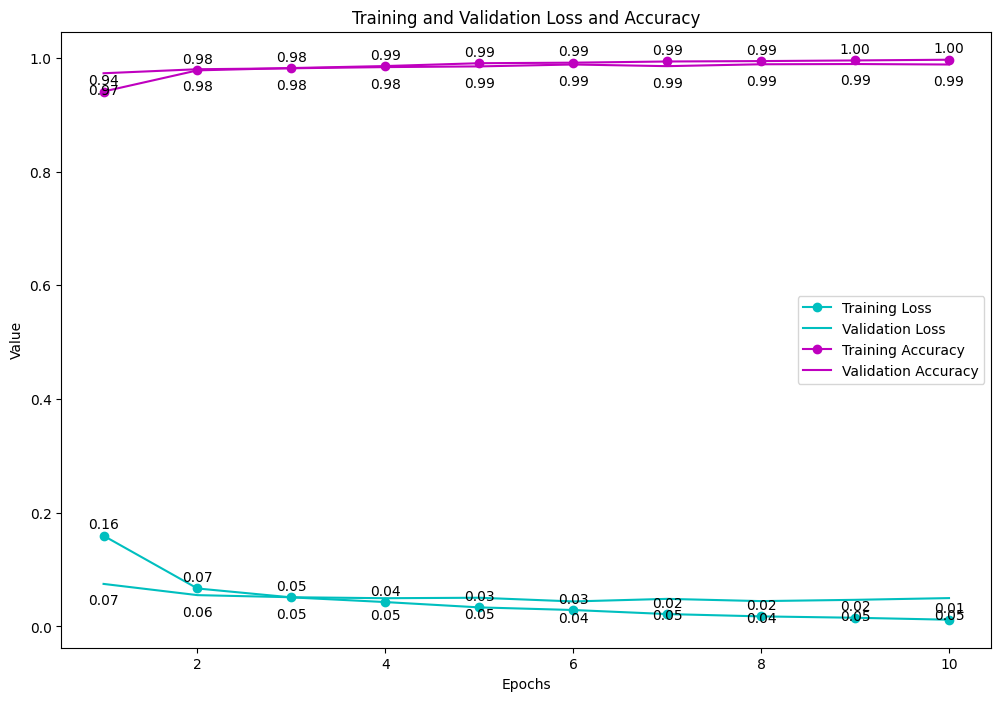

In [9]:
import matplotlib.pyplot as plt
# Obtener los datos del entrenamiento y la validación
history_dict = modelHistory.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Crear una figura
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(12, 8))

# Gráfico de Loss
plt.plot(epochs, loss, 'co-', label='Training Loss')
plt.plot(epochs, val_loss, 'c-', label='Validation Loss')

# Añadir anotaciones para Loss
for i, (l, vl) in enumerate(zip(loss, val_loss), 1):
    plt.annotate(f'{l:.2f}', (i, l), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{vl:.2f}', (i, vl), textcoords="offset points", xytext=(0, -15), ha='center')

# Gráfico de Accuracy en el mismo gráfico
plt.plot(epochs, accuracy, 'mo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'm-', label='Validation Accuracy')

# Añadir anotaciones para Accuracy
for i, (a, va) in enumerate(zip(accuracy, val_accuracy), 1):
    plt.annotate(f'{a:.2f}', (i, a), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.annotate(f'{va:.2f}', (i, va), textcoords="offset points", xytext=(0, -15), ha='center')

# Añadir títulos y etiquetas
plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

# Mostrar el gráfico
plt.show()

In [12]:
# Obtener los datos del entrenamiento y la validación
history_dict = modelHistory.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
# precision = history_dict['precision']
# val_precision = history_dict['val_precision']
# recall = history_dict['recall']
# val_recall = history_dict['val_recall']
# auc = history_dict['auc']
# val_auc = history_dict['val_auc']

In [13]:

# Obtener el accuracy y loss de entrenamiento y validación
accuracy_train = modelHistory.history['accuracy']
loss_train = modelHistory.history['loss']
accuracy_val = modelHistory.history['val_accuracy']
loss_val = modelHistory.history['val_loss']

# Calcular el promedio del accuracy y loss
avg_accuracy_train = sum(accuracy_train) / len(accuracy_train)
avg_loss_train = sum(loss_train) / len(loss_train)
avg_accuracy_val = sum(accuracy_val) / len(accuracy_val)
avg_loss_val = sum(loss_val) / len(loss_val)

print("Promedio de Accuracy (entrenamiento):", avg_accuracy_train)
print("Promedio de Loss (entrenamiento):", avg_loss_train)
print("Promedio de Accuracy (validación):", avg_accuracy_val)
print("Promedio de Loss (validación):", avg_loss_val)

Promedio de Accuracy (entrenamiento): 0.9849303662776947
Promedio de Loss (entrenamiento): 0.044900264404714105
Promedio de Accuracy (validación): 0.9843723952770234
Promedio de Loss (validación): 0.05147432424128055


# FGSM

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:

# Implementar FGSM
def fgsm_attack(model, loss_object, image, label, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = loss_object(label, prediction)
    
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    adversarial_image = image + epsilon * signed_grad
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
    
    return adversarial_image


# Configurar la pérdida
loss_object = tf.keras.losses.BinaryCrossentropy()

# Seleccionar una muestra del conjunto de prueba para el ataque adversario
sample_index = 3
sample_image = tf.convert_to_tensor([X_test.iloc[sample_index]], dtype=tf.float32)
sample_label = tf.convert_to_tensor([y_test.iloc[sample_index]], dtype=tf.float32)

# Realizar el ataque FGSM
epsilon = 0.1
adversarial_image = fgsm_attack(model, loss_object, sample_image, sample_label, epsilon)

# Evaluar la imagen adversaria
pred_original = model.predict(sample_image)
pred_adversarial = model.predict(adversarial_image)

print("Predicción original:", pred_original)
print("Predicción adversaria:", pred_adversarial)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicción original: [[0.9976271]]
Predicción adversaria: [[1.16301406e-10]]


/home/b7032681/.local/lib/python3.10/site-packages/tensorflow/python/framework/constant_op.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return ops.EagerTensor(value, ctx.device_name, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

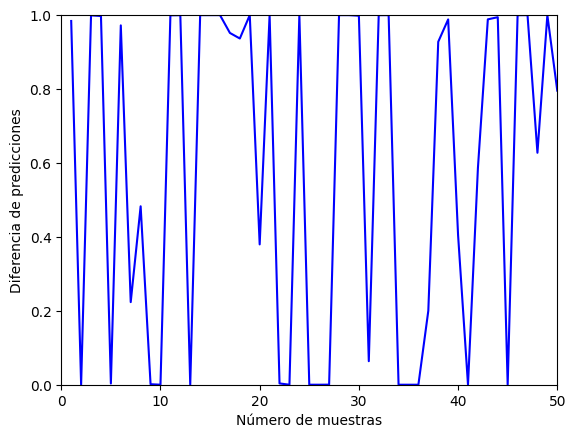

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Configurar la pérdida
loss_object = tf.keras.losses.BinaryCrossentropy()

# Parámetro de perturbación
epsilon = 0.1

# Variables para almacenar resultados
original_predictions = []
adversarial_predictions = []

# Generar y evaluar 1000 muestras adversarias
num_samples = 50

# Configurar la gráfica
plt.ion()  # Modo interactivo
fig, ax = plt.subplots()
x_data = []
y_data = []

line, = ax.plot(x_data, y_data, 'b-')
ax.set_xlim(0, num_samples)
ax.set_ylim(0, 1)  # Ajusta según la escala de las predicciones
ax.set_xlabel('Número de muestras')
ax.set_ylabel('Diferencia de predicciones')

for i in range(num_samples):
    sample_image = tf.convert_to_tensor([X_test.iloc[i]], dtype=tf.float32)
    sample_label = tf.convert_to_tensor([y_test.iloc[i]], dtype=tf.float32)
    
    adversarial_image = fgsm_attack(model, loss_object, sample_image, sample_label, epsilon)
    
    pred_original = model.predict(sample_image)
    pred_adversarial = model.predict(adversarial_image)
    
    original_predictions.append(pred_original)
    adversarial_predictions.append(pred_adversarial)
    
    # Calcula la diferencia entre las predicciones originales y adversarias
    diff = np.abs(pred_original - pred_adversarial).mean()
    
    # Actualiza los datos de la gráfica
    x_data.append(i + 1)
    y_data.append(diff)
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    
    # Redibuja la gráfica
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    # Print opcional para debug
    # print(f"Muestra {i+1}/{num_samples}")
    # print("Predicción original:", pred_original)
    # print("Predicción adversaria:", pred_adversarial)

# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions)
adversarial_predictions = np.array(adversarial_predictions)

# Aquí puedes agregar código para analizar los resultados


Pérdida original: 0.005992547
Pérdida adversaria: 6.202716
Accuracy original: 1.0
Accuracy adversaria: 0.42


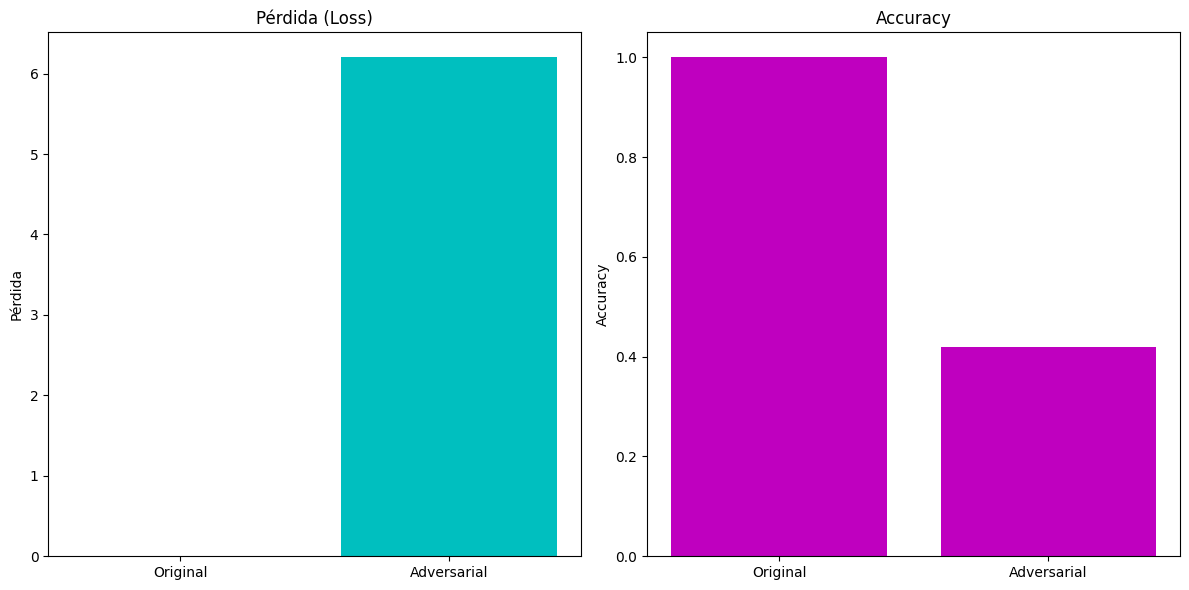

In [17]:
# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions).flatten()
adversarial_predictions = np.array(adversarial_predictions).flatten()

# Calcular la pérdida y el accuracy para las predicciones originales y adversarias
y_test_sampled = y_test.iloc[:num_samples].values

loss_original = loss_object(y_test_sampled, original_predictions).numpy()
loss_adversarial = loss_object(y_test_sampled, adversarial_predictions).numpy()

accuracy_original = np.mean((original_predictions > 0.5).astype(int) == y_test_sampled)
accuracy_adversarial = np.mean((adversarial_predictions > 0.5).astype(int) == y_test_sampled)

print("Pérdida original:", loss_original)
print("Pérdida adversaria:", loss_adversarial)
print("Accuracy original:", accuracy_original)
print("Accuracy adversaria:", accuracy_adversarial)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.bar(['Original', 'Adversarial'], [loss_original, loss_adversarial], color="c")
plt.title('Pérdida (Loss)')
plt.ylabel('Pérdida')

# Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Original', 'Adversarial'], [accuracy_original, accuracy_adversarial], color="m")
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

Pérdida original: 0.00060675084
Pérdida adversaria: 5.783401
Accuracy original: 1.0
Accuracy adversaria: 0.4
F1 Score original: 1.0
F1 Score adversaria: 0.0625


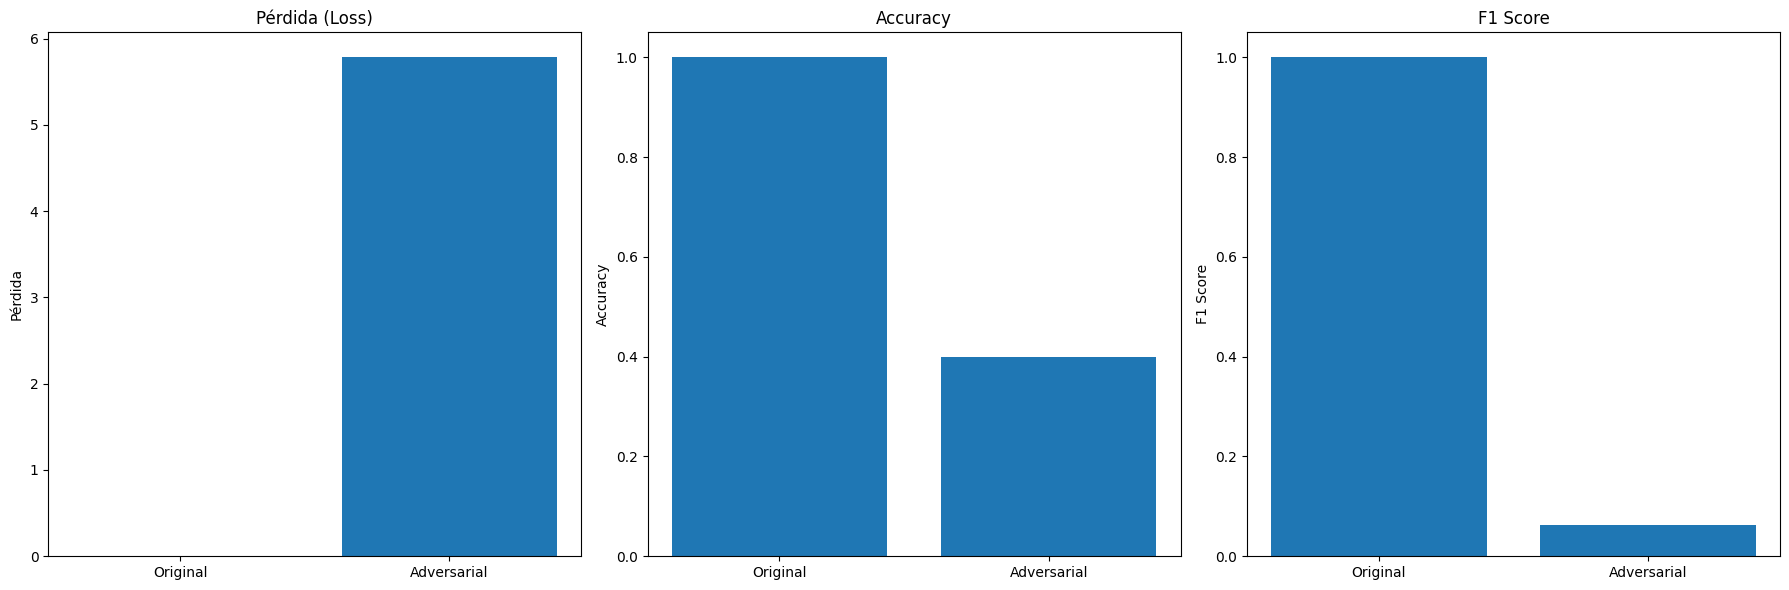

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Convertir los resultados a arrays numpy para análisis posterior
original_predictions = np.array(original_predictions).flatten()
adversarial_predictions = np.array(adversarial_predictions).flatten()

# Calcular la pérdida y el accuracy para las predicciones originales y adversarias
y_test_sampled = y_test.iloc[:num_samples].values

loss_original = loss_object(y_test_sampled, original_predictions).numpy()
loss_adversarial = loss_object(y_test_sampled, adversarial_predictions).numpy()

accuracy_original = np.mean((original_predictions > 0.5).astype(int) == y_test_sampled)
accuracy_adversarial = np.mean((adversarial_predictions > 0.5).astype(int) == y_test_sampled)

# Calcular el F1 Score
f1_original = f1_score(y_test_sampled, (original_predictions > 0.5).astype(int))
f1_adversarial = f1_score(y_test_sampled, (adversarial_predictions > 0.5).astype(int))

print("Pérdida original:", loss_original)
print("Pérdida adversaria:", loss_adversarial)
print("Accuracy original:", accuracy_original)
print("Accuracy adversaria:", accuracy_adversarial)
print("F1 Score original:", f1_original)
print("F1 Score adversaria:", f1_adversarial)

# Graficar los resultados
plt.figure(figsize=(18, 6))

# Pérdida
plt.subplot(1, 3, 1)
plt.bar(['Original', 'Adversarial'], [loss_original, loss_adversarial])
plt.title('Pérdida (Loss)')
plt.ylabel('Pérdida')

# Accuracy
plt.subplot(1, 3, 2)
plt.bar(['Original', 'Adversarial'], [accuracy_original, accuracy_adversarial])
plt.title('Accuracy')
plt.ylabel('Accuracy')

# F1 Score
plt.subplot(1, 3, 3)
plt.bar(['Original', 'Adversarial'], [f1_original, f1_adversarial])
plt.title('F1 Score')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()